In [1]:
import pandas as pd
import utils
import plotly.io as pio
from plotly.io import show
import numpy as np

import matplotlib.pyplot as plt

from skfolio import Population, RiskMeasure, Portfolio
from skfolio.model_selection import cross_val_predict, CombinatorialPurgedCV
from skfolio.optimization import (
    MeanRisk,
    ObjectiveFunction,
    EqualWeighted,
    InverseVolatility,
    RiskBudgeting
)

# Fetch Data


In [44]:
tickers = [
    "COLPAL",
    "SANOFI",
    "LICI",
    "COALINDIA",
    "TCS", #
    "CASTROLIND",
    "IRCTC",
    # "AIIL",
    "INGERRAND",
    "GILLETTE",
    "CAMS",
    "ANANDRATHI",
    "CGPOWER",
    "MSUMI", 
    "ABBOTINDIA", #
    "ABB",
    "HAL",
    "HDFCAMC",
    "VBL",
    "NTPC",
    "BEL",
    "IRFC",
    "NHPC"
]

In [45]:
ret = utils.get_multiple_returns(tickers)
ret

,COLPAL,SANOFI,LICI,COALINDIA,TCS,CASTROLIND,IRCTC,INGERRAND,GILLETTE,CAMS,...,MSUMI,ABBOTINDIA,ABB,HAL,HDFCAMC,VBL,NTPC,BEL,IRFC,NHPC
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-18,0.019488,0.008787,0.001257,0.005419,-0.000811,0.015349,-0.016688,0.000585,-0.003347,-0.011339,...,-0.000789,0.013577,-0.006690,0.005593,-0.020040,-0.006037,-0.013289,0.001504,0.002326,-0.025836
2022-05-19,-0.025809,-0.012919,-0.040509,-0.023444,-0.054178,-0.034356,-0.025158,-0.026622,-0.003123,-0.011976,...,-0.018167,0.014195,-0.001733,0.002826,-0.038505,-0.038116,-0.003367,-0.024024,-0.006961,-0.009360
2022-05-20,0.014253,0.001850,-0.017482,0.026214,0.009519,0.023245,0.011300,0.007809,0.006182,0.049533,...,-0.001609,-0.009865,0.006198,0.042385,0.000029,0.039768,0.010811,0.032747,0.004673,0.007874
2022-05-23,-0.001166,0.007866,-0.011257,-0.008873,0.008731,-0.009736,-0.013590,0.041653,0.005223,-0.025807,...,0.007252,-0.011852,0.003451,0.033349,0.016669,-0.022024,0.003676,-0.015110,-0.004651,0.012500
2022-05-24,-0.021450,-0.004389,0.007651,-0.010581,-0.010160,0.000936,-0.003215,0.002457,-0.010778,0.000251,...,0.004000,0.025919,-0.006073,-0.017155,-0.018960,0.027802,-0.021645,0.001080,0.007009,0.023148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-13,-0.006530,-0.353393,0.003856,-0.001637,0.012136,-0.012243,-0.009153,-0.006741,-0.000822,0.010755,...,0.052159,0.002065,0.019998,0.043097,-0.001986,0.013353,-0.003636,0.035800,-0.014407,-0.008433
2024-06-14,0.005586,0.050000,0.064402,-0.001947,-0.011887,0.007062,0.000639,-0.004965,-0.008698,-0.023940,...,0.017764,-0.005497,0.067885,0.019776,0.004567,0.038453,-0.004055,0.028913,-0.001884,0.002835
2024-06-18,-0.002337,0.049995,-0.009701,0.004313,-0.004423,-0.005982,0.013946,0.009773,0.015985,0.020027,...,0.065485,-0.009716,-0.016962,0.064013,0.004221,-0.008754,0.003257,0.027939,0.005206,-0.008675


In [46]:
import os
dir = '../res/data'
for file in os.listdir(dir):
    df = pd.read_parquet(os.path.join(dir, file))
    print(f'{file}: {df.shape[0]} rows')

HDFCAMC.parquet: 1445 rows
CASTROLIND.parquet: 5426 rows
SANOFI.parquet: 5453 rows
ABBOTINDIA.parquet: 5426 rows
TCS.parquet: 5424 rows
MSUMI.parquet: 549 rows
IRCTC.parquet: 1159 rows
COALINDIA.parquet: 3356 rows
CAMS.parquet: 916 rows
CGPOWER.parquet: 5456 rows
AIIL.parquet: 39 rows
LICI.parquet: 516 rows
NTPC.parquet: 4842 rows
INGERRAND.parquet: 5453 rows
IRFC.parquet: 835 rows
GILLETTE.parquet: 5453 rows
^NSEI.parquet: 4105 rows
ANANDRATHI.parquet: 619 rows
BEL.parquet: 5453 rows
VBL.parquet: 1880 rows
COLPAL.parquet: 5456 rows
NHPC.parquet: 3648 rows
ABB.parquet: 5456 rows
HAL.parquet: 1534 rows


In [47]:
nse = utils.get_returns("^NSEI", index=True)
nse.index = nse["Date"]
nse = nse.drop(columns=["Date"]).loc[ret.index[0] :]
nse

,^NSEI
Date,
2022-05-18,-0.001169
2022-05-19,-0.026533
2022-05-20,0.028891
2022-05-23,-0.003163
2022-05-24,-0.005523
...,...
2024-06-13,0.003256
2024-06-14,0.002851
2024-06-18,0.003933


# Models


### Sharpe Ratio Maximization


In [49]:
sharpe_model = MeanRisk(
    risk_measure=RiskMeasure.VARIANCE,
    objective_function=ObjectiveFunction.MAXIMIZE_RATIO,
    portfolio_params=dict(name="Max Sharpe"),
)
sharpe_pred = sharpe_model.fit_predict(ret)
sharpe_pred.annualized_sharpe_ratio

5.045828904412032

### Minimum Variance


In [50]:
inv_var_model = InverseVolatility(portfolio_params=dict(name="Minimum Variance"))
inv_var_pred = inv_var_model.fit_predict(ret)
inv_var_pred.annualized_sharpe_ratio

3.4226996786225437

### Minimum CVaR

In [51]:
cvar_model = RiskBudgeting(risk_measure=RiskMeasure.CVAR, portfolio_params=dict(name="Minimum CVaR"))
cvar_pred = cvar_model.fit_predict(ret)
cvar_pred.annualized_sharpe_ratio

3.7197667739658966

### NIFTY50 Benchmark


In [52]:
benchmark = EqualWeighted(portfolio_params=dict(name="NIFTY50"))
bench_pred = benchmark.fit_predict(nse)
bench_pred.annualized_sharpe_ratio

1.469700183988489

### Clustering Optimization


In [53]:
import skfolio.optimization as opt

inner_estimator = MeanRisk(
    objective_function=ObjectiveFunction.MAXIMIZE_RATIO,
    risk_measure=RiskMeasure.VARIANCE,
)
outer_estimator = opt.RiskBudgeting(risk_measure=RiskMeasure.CVAR)

cluster_model = opt.NestedClustersOptimization(
    inner_estimator=inner_estimator,
    outer_estimator=outer_estimator,
    n_jobs=-1,
    portfolio_params=dict(name="NCO-1"),
)
cluster_pred = cluster_model.fit_predict(ret)
cluster_pred.annualized_sharpe_ratio

4.225127453260971

### Rolling Window Optimization


In [55]:
#rolling_pred = utils.rolling_window_portfolio(ret, 5)

In [56]:
population = Population(
    [cluster_pred, sharpe_pred, inv_var_pred, cvar_pred, bench_pred]
)
population.set_portfolio_params(compounded=True)
population.plot_composition()

In [58]:
population.plot_cumulative_returns()

In [60]:
summary = population.summary()
summary#[summary.index.str.contains("Annualized")]

,NCO-1,Max Sharpe,Minimum Variance,Minimum CVaR,NIFTY50
Mean,0.20%,0.30%,0.19%,0.18%,0.075%
Annualized Mean,50.27%,74.41%,47.80%,46.33%,18.97%
Variance,0.0056%,0.0086%,0.0077%,0.0062%,0.0066%
Annualized Variance,1.42%,2.17%,1.95%,1.55%,1.67%
Semi-Variance,0.0030%,0.0046%,0.0048%,0.0036%,0.0036%
Annualized Semi-Variance,0.76%,1.16%,1.20%,0.90%,0.91%
Standard Deviation,0.75%,0.93%,0.88%,0.78%,0.81%
Annualized Standard Deviation,11.90%,14.75%,13.97%,12.46%,12.91%
Semi-Deviation,0.55%,0.68%,0.69%,0.60%,0.60%
Annualized Semi-Deviation,8.71%,10.79%,10.95%,9.50%,9.53%


In [61]:
population.composition() * 1_00_000

,NCO-1,Max Sharpe,Minimum Variance,Minimum CVaR,NIFTY50
asset,,,,,
GILLETTE,17172.744025,3338.462055,6012.763946,7863.517822,0.0
ANANDRATHI,14985.087844,26302.316035,4556.928155,6173.288645,0.0
COLPAL,14459.639223,11055.217113,6386.396133,7946.119643,0.0
SANOFI,10410.898936,0.000000,4100.421416,4794.321823,0.0
ABBOTINDIA,8790.470644,8487.219797,6448.863822,11587.248241,0.0
CGPOWER,5515.211616,10858.930799,3933.680647,5402.158735,0.0
VBL,4570.247930,10986.849017,3837.884412,4944.329294,0.0
INGERRAND,4327.088381,7840.311775,3894.293889,4184.301711,0.0
ABB,4150.847082,3503.234561,4064.240818,3237.392975,0.0


In [62]:
comp = population.composition()
comp['Minimum CVaR']

asset
GILLETTE      0.078635
ANANDRATHI    0.061733
COLPAL        0.079461
SANOFI        0.047943
ABBOTINDIA    0.115872
CGPOWER       0.054022
VBL           0.049443
INGERRAND     0.041843
ABB           0.032374
HAL           0.026762
CASTROLIND    0.034298
IRFC          0.023564
HDFCAMC       0.035487
COALINDIA     0.029640
MSUMI         0.043622
TCS           0.074392
BEL           0.025916
CAMS          0.033398
NTPC          0.035599
NHPC          0.023980
IRCTC         0.026644
LICI          0.025372
^NSEI         0.000000
Name: Minimum CVaR, dtype: float64

<Axes: >

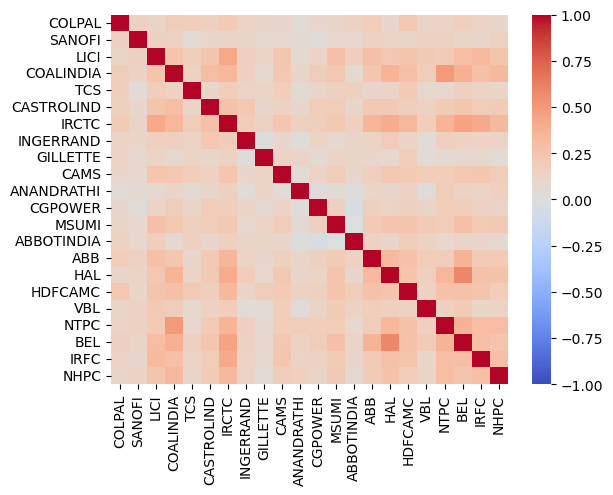

In [63]:
import seaborn as sns

sns.heatmap(ret.corr(method='spearman'), cmap='coolwarm', vmin=-1, vmax=1)